In [295]:
#Prerequisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import accuracy_score,recall_score,precision_score,auc,confusion_matrix,f1_score,precision_recall_fscore_support,

## 1. Data Acquisition <a class="anchor" id="DA"></a>

Data sets are fetched from reading .csv files.

In [216]:
data=pd.read_csv("bank-additional-full.csv")

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Exploratory Data Analysis <a class="anchor" id="EDA"></a>
### 2.1 Data information
Understanding the given dataset and helps clean up the dataset.

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2.2 Missing values
Detecting Null or NA values in the dataframe in order to avoid bias or the loss of accuracy.

In [218]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [219]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### 2.3 Duplicate rows
Detecting duplicate rows in the dataframe in order to avoid bias or the loss of accuracy.

In [220]:
data.duplicated().value_counts()

False    41176
True        12
dtype: int64

In [221]:
data=data.drop_duplicates()

In [222]:
data.shape

(41176, 21)

### 2.4 Categorical Variables
Finding categorical variables that need to be one-hot encoded in the future.

In [223]:
categorical=[]

#Finding character variables in the data frame
for i in data.columns:
    if data[i].dtype=='O':
        categorical.append(i)

In [224]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### 2.5 Data balance
Finding categorical variables that need to be one-hot encoded in the future.

In [225]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

#### 2.5.1 Undersampling

In [226]:
# Class count
count_class_0, count_class_1 = data['y'].value_counts()

# Divide by class
data_class_0 = data[data['y'] == 'no']
data_class_1 = data[data['y'] == 'yes']

In [227]:
data_class_0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [228]:
data_class_0_under = data_class_0.sample(n=count_class_1)
data_under = pd.concat([data_class_0_under, data_class_1], axis=0)

data_under['y'].value_counts()

no     4639
yes    4639
Name: y, dtype: int64

In [229]:
data_under1=data_under
data_under2=data_under
data_under3=data_under

#### 2.5.2 Oversampling

In [230]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_over = pd.concat([data_class_0, data_class_1_over], axis=0)

data_over['y'].value_counts()

no     36537
yes    36537
Name: y, dtype: int64

In [231]:
data_over1=data_over
data_over2=data_over
data_over3=data_over

### 2.6 Outlier removal
Outliers are those data points which differs significantly from other observations present in given dataset. It can occur because of variability in measurement and due to misinterpretation in filling data points.

One of the simplest methods for detecting outliers is box plots. A box plot is a graphical display for describing the distributions of the data. Box plots use the median and the lower and upper quartiles. 

In [232]:
data_under.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000,9278.000000
mean,40.358375,387.193684,2.358051,886.610584,0.318388,-0.503341,93.473588,-40.228325,2.955511,5135.296680
std,11.996790,359.128853,2.409481,314.633380,0.702441,1.720113,0.631104,5.367383,1.888460,86.691161
min,17.000000,2.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,144.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,526.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [233]:
data_over.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000,73074.000000
mean,40.406602,386.673235,2.342105,887.408093,0.314763,-0.493230,93.481142,-40.200512,2.962014,5135.340133
std,11.998919,360.012680,2.365408,313.624516,0.696643,1.720263,0.631791,5.343531,1.890650,87.075807
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,144.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,520.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The standard deviation indicates the dispersion of the data relative to its mean and is calculated as the square root of the variance.

From above results, we can see that 'duration','pdays' and 'nr.employed' have high std. However, 'pdays' aligns with uniform distribution and can not be dealt with quartile removal. In this way, we decide to remove outliers for the other features first by drawing box plot.

Text(0.5, 1.0, 'Distribution of pdays')

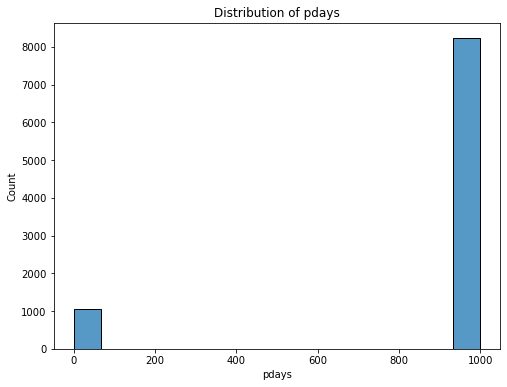

In [234]:
fig,ax=plt.subplots(figsize=(8,6))
#ax.set_xlim(0,)
sns.histplot(data_under['pdays'],ax=ax).set_title('Distribution of pdays')

'duration' of undersample

Text(0.5, 0, 'feature')

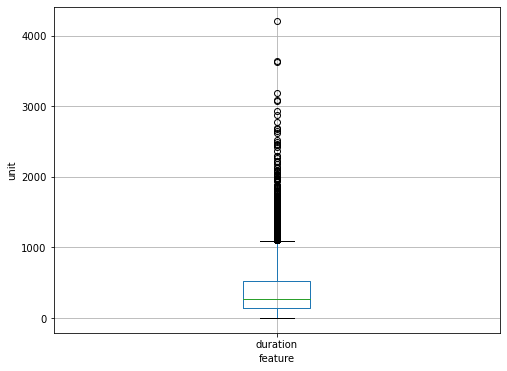

In [235]:
#Box plot
boxplot=data_under1.boxplot(column=['duration'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [236]:
num1=data_under1.shape[0]
Q1 = data_under1['duration'].quantile(0.25)
Q3 = data_under1['duration'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data_under1['duration'] >= Q1 - 1.5 * IQR) & (data_under1['duration'] <= Q3 + 1.5 *IQR)
data_under1=data_under1.loc[filter]

Text(0.5, 0, 'feature')

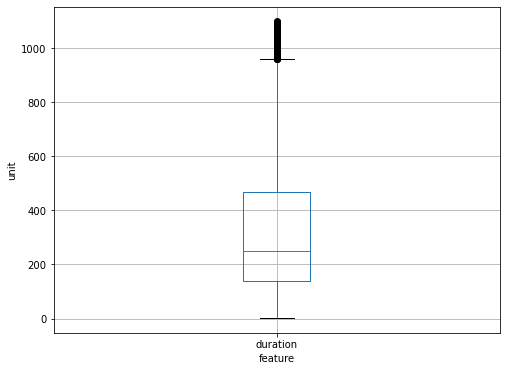

In [237]:
#Box plot
boxplot=data_under1.boxplot(column=['duration'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

'nr.employed' of undersample

Text(0.5, 0, 'feature')

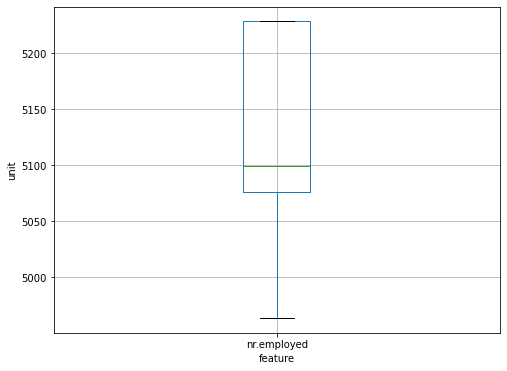

In [238]:
#Box plot
boxplot=data_under1.boxplot(column=['nr.employed'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [239]:
num1=data_under1.shape[0]
Q1 = data_under1['nr.employed'].quantile(0.25)
Q3 = data_under1['nr.employed'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data_under1['nr.employed'] >= Q1 - 1.5 * IQR) & (data_under1['nr.employed'] <= Q3 + 1.5 *IQR)
data_under1=data_under1.loc[filter]

Text(0.5, 0, 'feature')

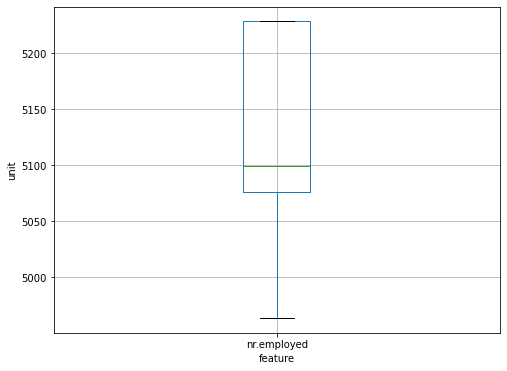

In [240]:
#Box plot
boxplot=data_under1.boxplot(column=['nr.employed'],figsize=(8,6))
boxplot.set_ylabel('unit')
boxplot.set_xlabel('feature')

In [241]:
data_under1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,8820.000000,8820.00000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000,8820.000000
mean,40.374943,331.49161,2.343764,882.686054,0.327778,-0.535828,93.467013,-40.200091,2.920433,5133.640431
std,12.073109,253.44612,2.416580,319.370515,0.713166,1.721673,0.634083,5.403885,1.889025,86.869392
min,17.000000,2.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,139.00000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,251.00000,2.000000,999.000000,0.000000,-1.100000,93.444000,-41.800000,1.663000,5099.100000
75%,48.000000,467.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.958000,5228.100000
max,98.000000,1098.00000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [242]:
data_under1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6290,30,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
18308,44,admin.,single,basic.6y,unknown,no,no,telephone,jul,wed,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
23991,51,self-employed,married,high.school,no,yes,no,cellular,aug,fri,...,6,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
5251,39,blue-collar,married,basic.9y,unknown,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
39482,61,retired,married,high.school,no,yes,no,cellular,apr,tue,...,4,999,0,nonexistent,-1.8,93.749,-34.6,0.642,5008.7,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2.7 Correlation coefficient
A high correlation coefficient would lead to a chance that the performance of the model will be impacted by the multicollinearity.

#### 2.7.1 Heatmap
Those VIFs who are greater than 10 would be considered as high multicollinearity features, thus should be removed.

C:\Users\intwe\AppData\Local\Temp\ipykernel_4192\2744395354.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_under1.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot:>

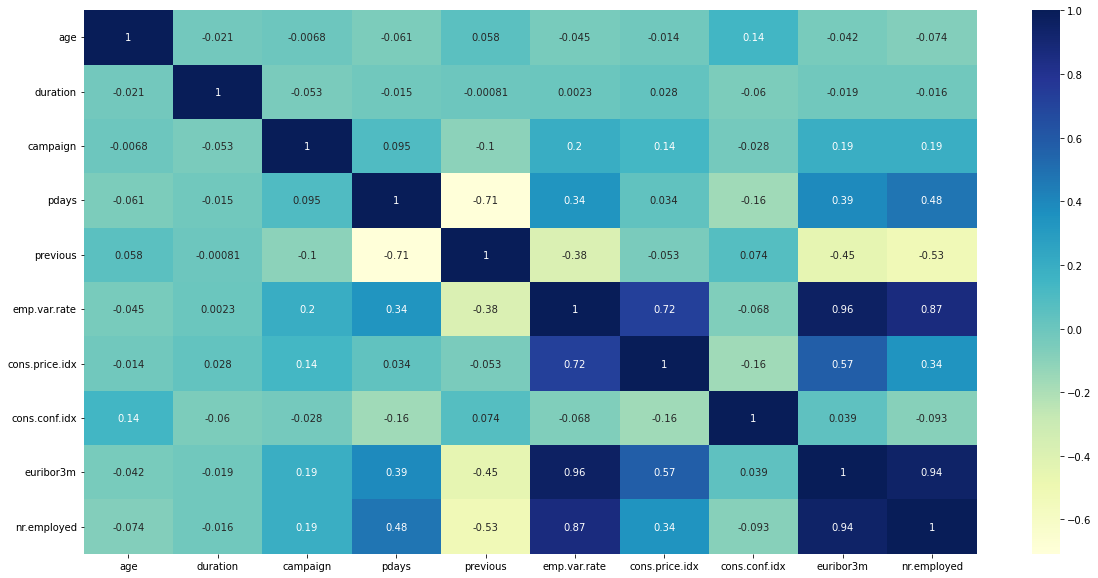

In [243]:
plt.figure(figsize=(20,10))
sns.heatmap(data_under1.corr(), annot=True, cmap='YlGnBu')

In [244]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [245]:
X = data_under2[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
result=calc_vif(X)
result

,variables,VIF
0,age,12.647443
1,duration,2.183391
2,campaign,2.049741
3,pdays,18.964244
4,previous,2.677880
5,emp.var.rate,28.110225
6,cons.price.idx,16876.146850
7,cons.conf.idx,86.179322
8,euribor3m,137.721352
9,nr.employed,20148.131436


In [246]:
data_under3=data_under3[[str(i) for i in result[result['VIF']<10]['variables']]]
data_under3

,duration,campaign,previous
6290,179,5,0
18308,383,7,0
23991,8,6,0
5251,563,1,0
39482,930,4,0
...,...,...,...
41174,208,1,6
41178,483,2,3
41181,281,1,0
41183,334,1,0


#### 2.7.2 Multicollinearity function
Using Variable Inflation Factor (VIF), setting it with a default threshold of 5.0. Those features that are greater than 5.0 would be considered high multicollinearity and will be removed.

In [248]:
from joblib import Parallel, delayed
from statsmodels.stats.outliers_influence import variance_inflation_factor
    
def removeMultiColl(data, vif_threshold = 5.0):
    for i in data.columns:
        if data[i].nunique() == 1:
            print(f"Dropping {i} due to just 1 unique value")
            data.drop(columns = i, inplace = True)
    drop = True
    col_list = list(data.columns)
    while drop == True:
        drop = False
        vif_list = Parallel(n_jobs = -1, verbose = 5)(delayed(variance_inflation_factor)(data[col_list].values, i) for i in range(data[col_list].shape[1]))
        max_index = vif_list.index(max(vif_list))
        if vif_list[max_index] > vif_threshold:
            print(f"Dropping column : {col_list[max_index]} at index - {max_index}")
            del col_list[max_index]
            drop = True
    print("Remaining columns :\n", list(data[col_list].columns))
    return data[col_list]

In [249]:
data_test=removeMultiColl(X)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Dropping column : nr.employed at index - 9
Dropping column : cons.price.idx at index - 6
Dropping column : cons.conf.idx at index - 6
Dropping column : euribor3m at index - 6
Dropping column : age at index - 0
Remaining columns :
 ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate']


[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    4.1s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    4.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0

In [250]:
data_test

,duration,campaign,pdays,previous,emp.var.rate
6290,179,5,999,0,1.1
18308,383,7,999,0,1.4
23991,8,6,999,0,1.4
5251,563,1,999,0,1.1
39482,930,4,999,0,-1.8
...,...,...,...,...,...
41174,208,1,1,6,-1.1
41178,483,2,6,3,-1.1
41181,281,1,999,0,-1.1
41183,334,1,999,0,-1.1


In [258]:
data_undersample1=data_under[categorical].join(data_under3)

In [259]:
data_undersample1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,duration,campaign,previous
6290,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,nonexistent,no,179,5,0
18308,admin.,single,basic.6y,unknown,no,no,telephone,jul,wed,nonexistent,no,383,7,0
23991,self-employed,married,high.school,no,yes,no,cellular,aug,fri,nonexistent,no,8,6,0
5251,blue-collar,married,basic.9y,unknown,no,no,telephone,may,fri,nonexistent,no,563,1,0
39482,retired,married,high.school,no,yes,no,cellular,apr,tue,nonexistent,no,930,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,208,1,6
41178,retired,married,university.degree,no,no,no,cellular,nov,thu,success,yes,483,2,3
41181,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes,281,1,0
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,334,1,0


In [261]:
data_undersample2=data_under[categorical].join(data_test)

In [262]:
data_undersample2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,duration,campaign,pdays,previous,emp.var.rate
6290,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,nonexistent,no,179,5,999,0,1.1
18308,admin.,single,basic.6y,unknown,no,no,telephone,jul,wed,nonexistent,no,383,7,999,0,1.4
23991,self-employed,married,high.school,no,yes,no,cellular,aug,fri,nonexistent,no,8,6,999,0,1.4
5251,blue-collar,married,basic.9y,unknown,no,no,telephone,may,fri,nonexistent,no,563,1,999,0,1.1
39482,retired,married,high.school,no,yes,no,cellular,apr,tue,nonexistent,no,930,4,999,0,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,retired,married,university.degree,no,yes,no,cellular,nov,thu,success,yes,208,1,1,6,-1.1
41178,retired,married,university.degree,no,no,no,cellular,nov,thu,success,yes,483,2,6,3,-1.1
41181,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes,281,1,999,0,-1.1
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes,334,1,999,0,-1.1


#### 2.7.3 Important features
Running a random forest model and then getting the most important features

In [274]:
data_under4=data_under

In [275]:
data_under4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6290,30,blue-collar,married,basic.9y,no,no,yes,telephone,may,tue,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
18308,44,admin.,single,basic.6y,unknown,no,no,telephone,jul,wed,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
23991,51,self-employed,married,high.school,no,yes,no,cellular,aug,fri,...,6,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
5251,39,blue-collar,married,basic.9y,unknown,no,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
39482,61,retired,married,high.school,no,yes,no,cellular,apr,tue,...,4,999,0,nonexistent,-1.8,93.749,-34.6,0.642,5008.7,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [276]:
for i in categorical:
    
    #Renameing variables to avoid repetition and ambiguity
    one_hot=pd.get_dummies(data_under4[i]).rename(columns=lambda x:i+'_'+str(x))
    
    #Removal of the last one-hot column to avoid multicollinearity
    one_hot=one_hot.iloc[:,:-1]
    data_under4=data_under4.drop(columns=i)
    data_under4=data_under4.join(one_hot)

In [277]:
data_under4

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,poutcome_failure,poutcome_nonexistent,y_no
6290,30,179,5,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,1,1
18308,44,383,7,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,0,0,0,0,0,0,0,1,1
23991,51,8,6,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,1,0,0,0,0,1,1
5251,39,563,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,0,0,1,1
39482,61,930,4,999,0,-1.8,93.749,-34.6,0.642,5008.7,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,208,1,1,6,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41178,62,483,2,6,3,-1.1,94.767,-50.8,1.031,4963.6,...,0,1,0,0,0,1,0,0,0,0
41181,37,281,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,1,0,0,0,0,1,0


In [290]:
#Input of data
X=data_under4.drop(columns=['y_no'])

#Output of data
y=data_under4['y_no']

In [291]:
#Data normalization
Scaler=StandardScaler()
X_=Scaler.fit_transform(X)

In [292]:
#75% of training and 25% of testing
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.25,random_state=0)

In [293]:
#Before normalization()
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.25,random_state=0)

In [294]:
rd_classifier=RandomForestClassifier(random_state=100,n_jobs=-1,verbose=True)
rd_classifier.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(n_jobs=-1, random_state=100, verbose=True)

In [301]:
rd_classifier_train_preds =rd_classifier.predict(X_train)
rd_classifier_preds=rd_classifier.predict(X_test)

precision_recall_fscore_support(y_train,rd_classifier_train_preds)
confusion_matrix(y_test,rd_classifier_preds)



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[1065,   86],
       [ 188,  981]], dtype=int64)

In [299]:
#Important features in the RF model
imp_dict={'Feature':X_train1.columns.to_list(),'Importance':rd_classifier.feature_importances_}
df_imp_dict=pd.DataFrame(imp_dict).sort_values(by='Importance',ascending=False).set_index('Feature')

In [300]:
df_imp_dict

,Importance
Feature,
duration,0.357840
euribor3m,0.099207
nr.employed,0.074060
age,0.058636
emp.var.rate,0.047096
campaign,0.030837
cons.price.idx,0.026081
cons.conf.idx,0.024484
pdays,0.022029
